In [83]:
import imageio as imageio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from tqdm import tqdm

In [84]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, palette, resolution=0.02, same_aspect=False):

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    x2_min, x2_max = X[:, 1].min() - 3, X[:, 1].max() + 3
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    fig, ax = plt.subplots()

    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette, ax=ax, zorder=2)

    plt.autoscale(False)
    Z[[0, 0]] = 0 # Needed that contourf takes correct colors when 0 is missing
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()), zorder=1)

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax

In [85]:
def plot_decision_regions_1d(X, y, classifier, palette, resolution=0.02, same_aspect=False):

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(-10, 10, resolution))
    mesh = np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(mesh[:, 0].reshape(-1, 1))
    Z = Z.reshape(xx1.shape)

    fig, ax = plt.subplots()

    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=[0] * X.shape[0], hue=y, ax=ax, zorder=2, palette=palette)

    plt.autoscale(False)
    Z[[0, 0]] = 0 # Needed that contourf takes correct colors when 0 is missing
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()), zorder=1)

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax


In [86]:
out_dir = os.path.join(os.getcwd(), "../../out/classification/cart")

In [87]:
from sklearn.preprocessing import StandardScaler

# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['sepal length', 'sepal width', 'petal length', 'petal width', 'name']].rename(columns={
    'sepal length': 'sepal length (cm)',
    'sepal width': 'sepal width (cm)',
    'petal length': 'petal length (cm)',
    'petal width': 'petal width (cm)',
})

order = pd.unique(df['name'])

# Two points with different classes have same petal length and petal width, which leads to confusing plots => filter them!
df = df.loc[df[['petal length (cm)', 'petal width (cm)']].drop_duplicates().index]


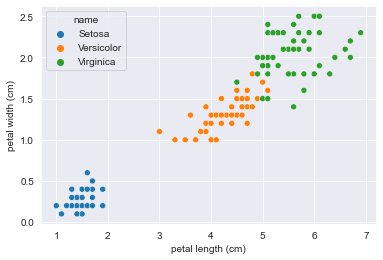

In [88]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='name', palette=dict(zip(
    order,
    sns.color_palette()
)))
plt.savefig(os.path.join(out_dir, 'cart-example-data-only.png'), bbox_inches='tight')
plt.show()

In [89]:
palette=dict(zip(
    order,
    sns.color_palette()
))

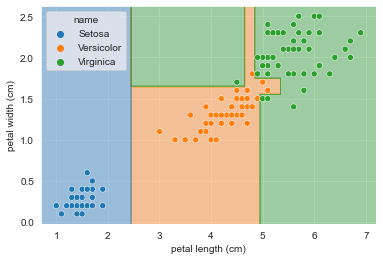

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

clf = DecisionTreeClassifier(random_state=0)
X = df[['petal length (cm)', 'petal width (cm)']]
y = OrdinalEncoder(categories=[order]).fit_transform(df[['name']])
clf.fit(X.values, y)

plot_decision_regions(X.values, df['name'], clf, palette=palette)
plt.savefig(os.path.join(out_dir, 'cart-example.png'), bbox_inches='tight')
plt.show()

In [91]:
import matplotlib
from sklearn.tree import DecisionTreeClassifier
import re

def plot_tree_colored(clf, feature_names, ax=None):

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    tree = plot_tree(clf, feature_names=feature_names, class_names=order)

    def replace_text(obj):
        if type(obj) == matplotlib.text.Annotation:
            txt = obj.get_text()
            txt = re.sub("\ngini[^$]*class","\nclass",txt) # Remove gini and samples from inner node
            txt = re.sub("gini[^$]*class","class",txt) # Remove gini and samples from leaves
            txt = re.sub("\nclass[^$]*","",txt) # Remove class in inner nodes
            obj.set_text(txt)
        return obj

    colors = list(sns.color_palette())
    ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]

    for node, impurity, value in zip(tree, clf.tree_.impurity, clf.tree_.value):
        # /  np.array([ np.count_nonzero(y == 0), np.count_nonzero(y == 1), np.count_nonzero(y == 2) ])
        r, g, b = colors[np.argmax(value)]
        f = impurity * 3/2 # for N colors: f = impurity * N/(N-1) if N>1 else 0
        node.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
        node.get_bbox_patch().set_edgecolor('black')


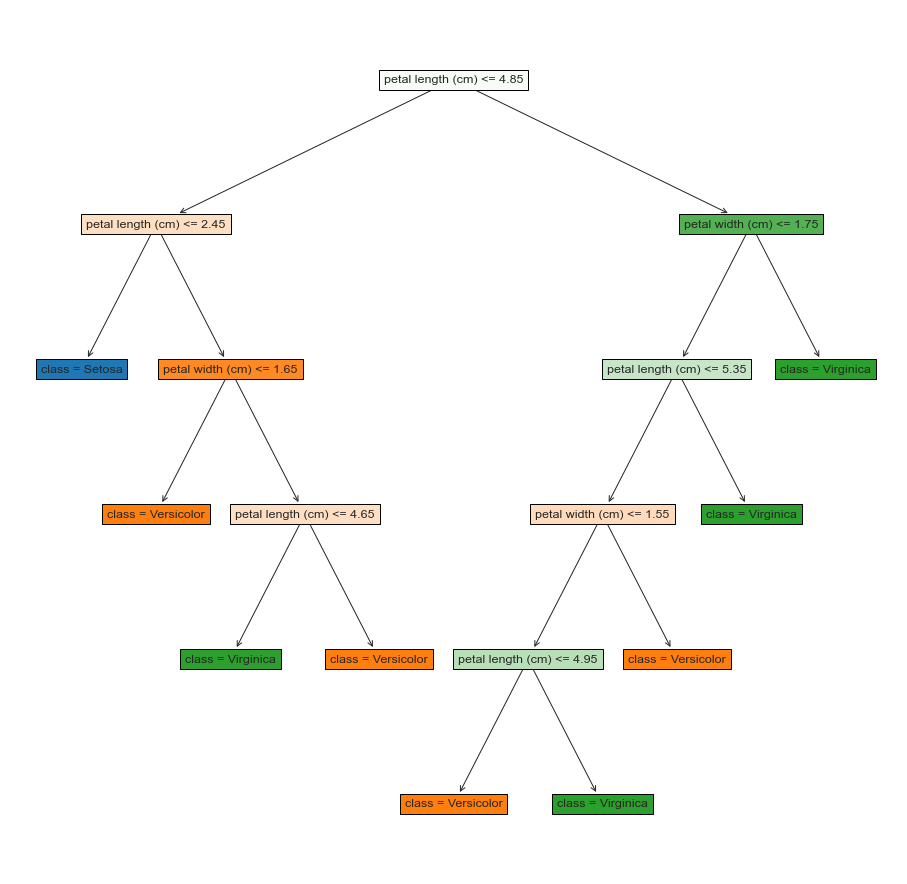

In [92]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(16, 16))
plot_tree_colored(clf, feature_names=X.columns, ax=ax)
plt.savefig(os.path.join(out_dir, 'cart-example-tree.png'), bbox_inches='tight')
plt.show()

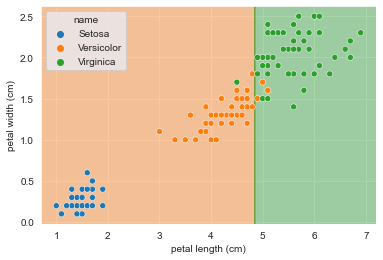

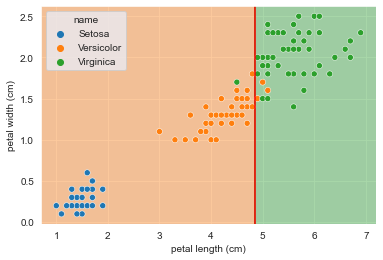

Accuracy with max-depth=1: 0.7450980392156863%


/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


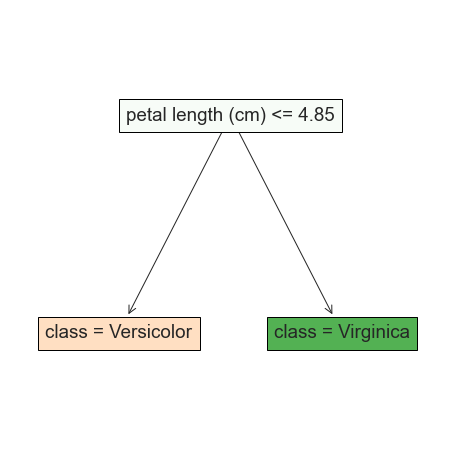

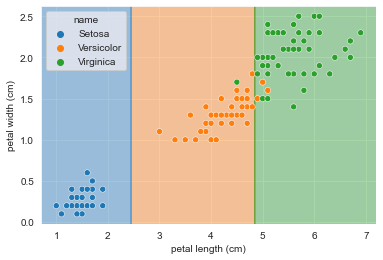

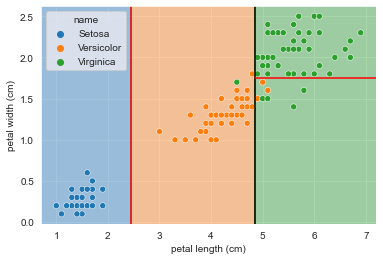

Accuracy with max-depth=2: 0.9607843137254902%


/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


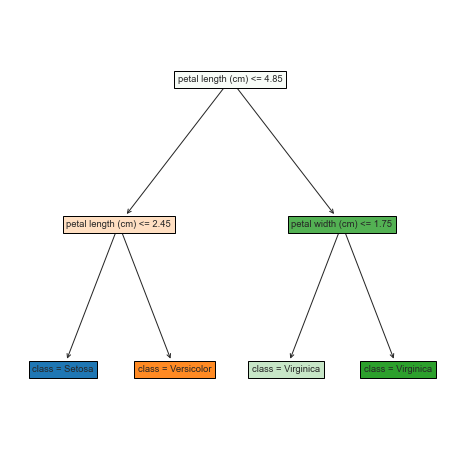

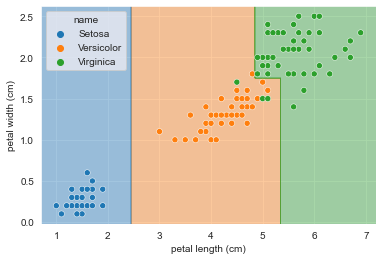

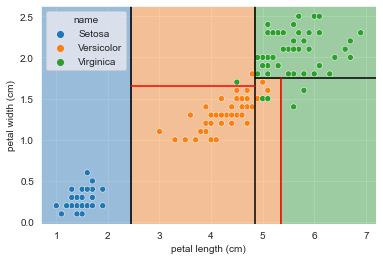

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy with max-depth=3: 0.9705882352941176%


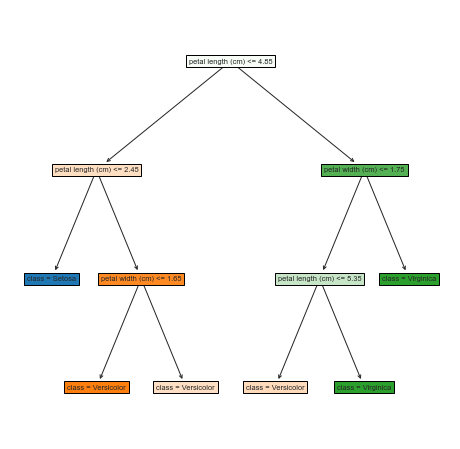

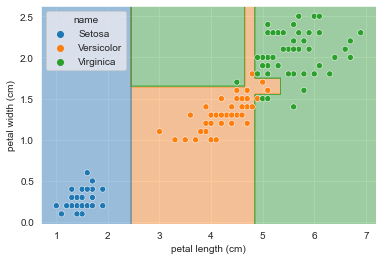

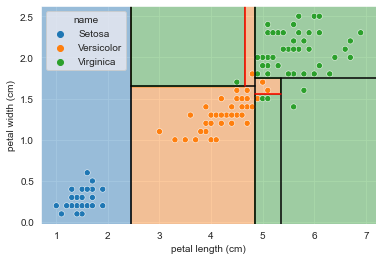

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy with max-depth=4: 0.9901960784313726%


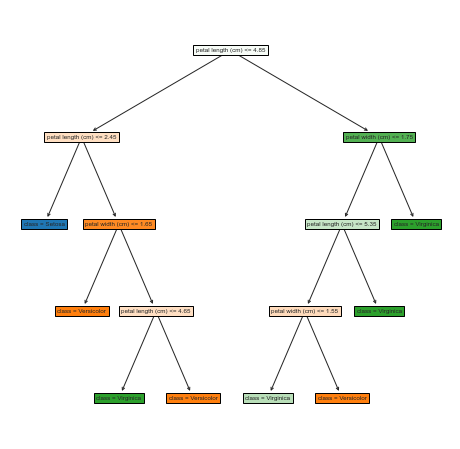

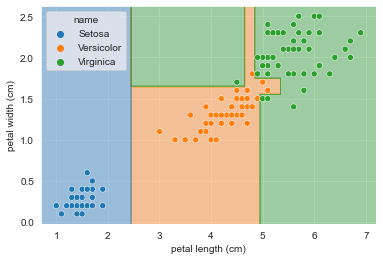

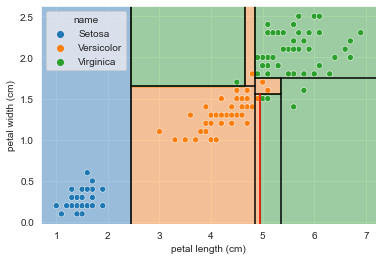

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy with max-depth=5: 1.0%


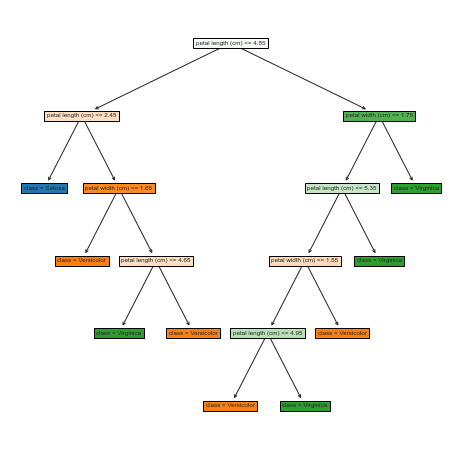

In [93]:
from sklearn.tree._tree import Tree, TREE_LEAF
from sklearn.metrics import accuracy_score

def plot_splits(tree: Tree, node_id: int, x_min = -10, x_max = 10, y_min = -10, y_max = 10, remaining_depth = None):
    def plot_split(feature, threshold, is_last = False):
        if feature == 0:
            plt.plot([threshold, threshold], [y_min, y_max], color='red' if is_last else 'black')
        else:
            plt.plot([x_min, x_max], [threshold, threshold], color='red' if is_last else 'black')
    left_id = tree.children_left[node_id]
    right_id = tree.children_right[node_id]
    remaining_depth = tree.max_depth - 1 if remaining_depth is None else remaining_depth - 1
    if left_id != -1 or right_id != -1:
        # node_id is branch
        feature = tree.feature[node_id]
        threshold = tree.threshold[node_id]
        plot_split(feature, threshold, remaining_depth == 0)
        if left_id != TREE_LEAF:
            plot_splits(tree, left_id, x_min, x_max if feature != 0 else threshold, y_min, y_max if feature != 1 else threshold, remaining_depth)
        if right_id != TREE_LEAF:
            plot_splits(tree, right_id, x_min if feature != 0 else threshold, x_max, y_min if feature != 1 else threshold, y_max, remaining_depth)

for max_depth in range(1, 6):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0).fit(X.values, y)

    plot_decision_regions(X.values, df['name'], clf, palette=palette)
    # plot_splits(clf.tree_, 0)
    plt.savefig(os.path.join(out_dir, f'cart-example-max-depth-{max_depth}-without-splits.png'), bbox_inches='tight')
    plt.show()

    plot_decision_regions(X.values, df['name'], clf, palette=palette)
    plot_splits(clf.tree_, 0)
    plt.savefig(os.path.join(out_dir, f'cart-example-max-depth-{max_depth}.png'), bbox_inches='tight')
    plt.show()

    plot_tree_colored(clf, feature_names=X.columns)
    plt.savefig(os.path.join(out_dir, f'cart-example-max-depth-{max_depth}-tree.png'), facecolor='white', bbox_inches='tight', transparent=False)
    print(f"Accuracy with max-depth={max_depth}: {accuracy_score(clf.predict(X), y)}%")
    plt.show()

## 1D

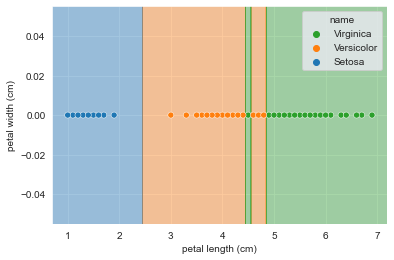

In [121]:
clf = DecisionTreeClassifier(random_state=0)
# Remove duplicates otherwise plot is confusing
df_sub = df.loc[df.sort_values(by='name', ascending=False)[['petal length (cm)']].drop_duplicates().index]
X = df_sub[['petal length (cm)']]
y = OrdinalEncoder(categories=[order]).fit_transform(df_sub[['name']])
clf.fit(X.values, y)

plot_decision_regions_1d(X.values, df_sub['name'], clf, palette=palette)
plt.savefig(os.path.join(out_dir, 'cart-example.png'), bbox_inches='tight')
plt.show()

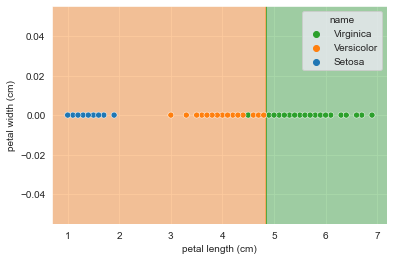

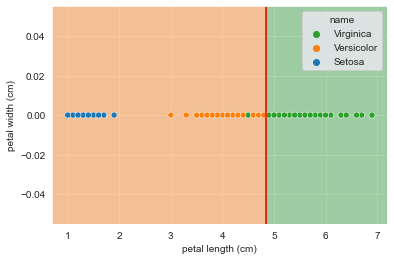

Accuracy with max-depth=1: 0.7674418604651163%


/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


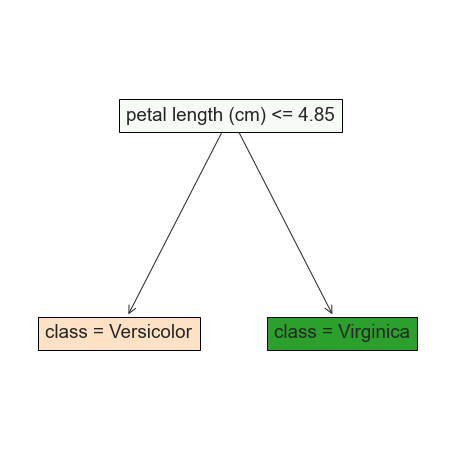

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


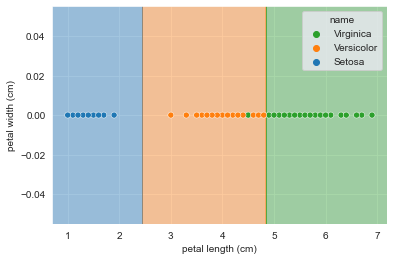

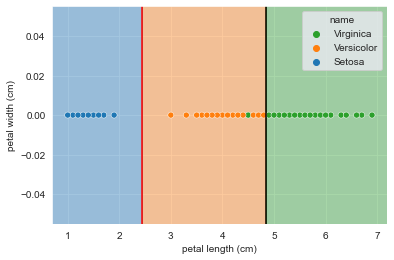

Accuracy with max-depth=2: 0.9767441860465116%


/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


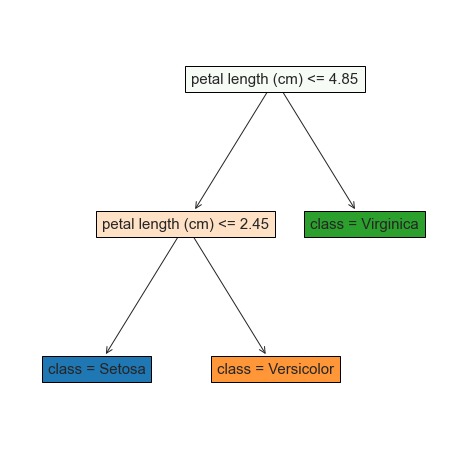

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


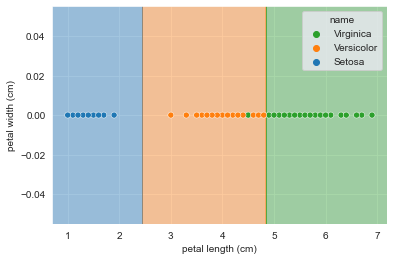

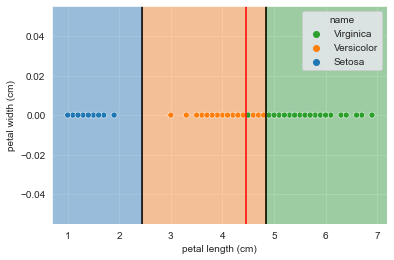

Accuracy with max-depth=3: 0.9767441860465116%


/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


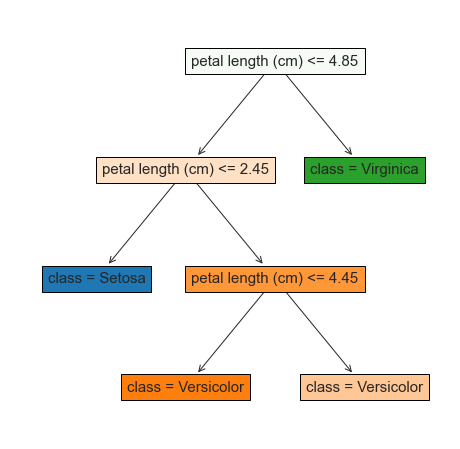

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


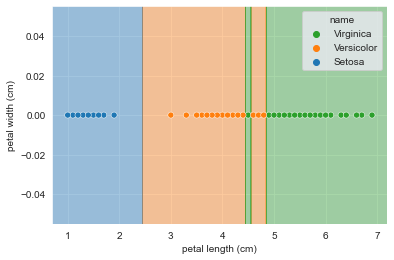

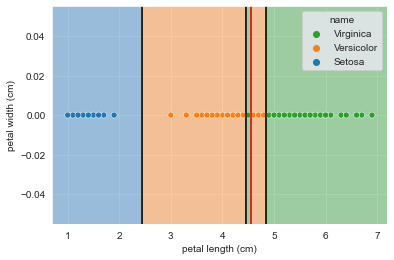

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy with max-depth=4: 1.0%


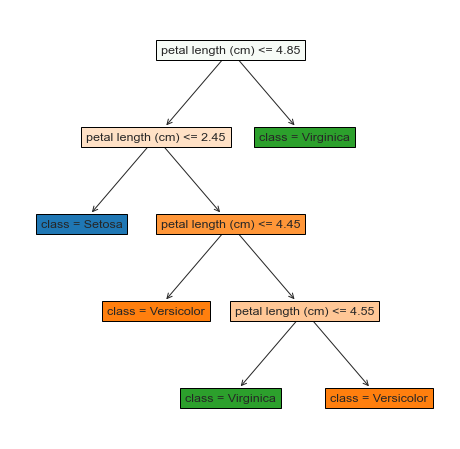

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [124]:
def plot_splits(tree: Tree, node_id: int, x_min = -10, x_max = 10, y_min = -10, y_max = 10, remaining_depth = None):
    def plot_split(feature, threshold, is_last = False):
        if feature == 0:
            plt.plot([threshold, threshold], [y_min, y_max], color='red' if is_last else 'black')
        else:
            plt.plot([x_min, x_max], [threshold, threshold], color='red' if is_last else 'black')
    left_id = tree.children_left[node_id]
    right_id = tree.children_right[node_id]
    remaining_depth = tree.max_depth - 1 if remaining_depth is None else remaining_depth - 1
    if left_id != -1 or right_id != -1:
        # node_id is branch
        feature = tree.feature[node_id]
        threshold = tree.threshold[node_id]
        plot_split(feature, threshold, remaining_depth == 0)
        if left_id != TREE_LEAF:
            plot_splits(tree, left_id, x_min, x_max if feature != 0 else threshold, y_min, y_max if feature != 1 else threshold, remaining_depth)
        if right_id != TREE_LEAF:
            plot_splits(tree, right_id, x_min if feature != 0 else threshold, x_max, y_min if feature != 1 else threshold, y_max, remaining_depth)

for max_depth in range(1, 6):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0).fit(X.values, y)

    plot_decision_regions_1d(X.values, df_sub['name'], clf, palette=palette)
    # plot_splits(clf.tree_, 0)
    plt.savefig(os.path.join(out_dir, f'cart-example-max-depth-{max_depth}-1d-without-splits.png'), bbox_inches='tight')
    plt.show()

    plot_decision_regions_1d(X.values, df_sub['name'], clf, palette=palette)
    plot_splits(clf.tree_, 0)
    plt.savefig(os.path.join(out_dir, f'cart-example-max-depth-{max_depth}-1d.png'), bbox_inches='tight')
    plt.show()

    plot_tree_colored(clf, feature_names=X.columns)
    plt.savefig(os.path.join(out_dir, f'cart-example-max-depth-{max_depth}-1d-tree.png'), facecolor='white', bbox_inches='tight', transparent=False)
    print(f"Accuracy with max-depth={max_depth}: {accuracy_score(clf.predict(X), y)}%")
    plt.show()
    if accuracy_score(clf.predict(X), y) == 1.0:
        break

## 3D

In [96]:
raise Error()

def plot_splits_2d(tree: Tree, node_id: int, x_min = -20, x_max = 20, y_min = -20, y_max = 20, z_min = -20, z_max = 20, remaining_depth = None):
    def plot_split(feature, threshold, is_last = False):
        if feature == 0:
            YY = np.arange(y_min, y_max, 0.25)
            ZZ = np.arange(z_min, z_max, 0.25)
            YY, ZZ = np.meshgrid(YY, ZZ)
            XX = np.array([threshold] * (YY.shape[0] * YY.shape[1])).reshape(YY.shape)
        elif feature == 1:
            XX = np.arange(x_min, x_max, 0.25)
            ZZ = np.arange(z_min, z_max, 0.25)
            XX, ZZ = np.meshgrid(XX, ZZ)
            YY = np.array([threshold] * (XX.shape[0] * XX.shape[1])).reshape(XX.shape)
        else:
            assert feature == 2
            XX = np.arange(x_min, x_max, 0.25)
            YY = np.arange(y_min, y_max, 0.25)
            XX, YY = np.meshgrid(XX, YY)
            ZZ = np.array([threshold] * (XX.shape[0] * XX.shape[1])).reshape(XX.shape)
        ax.plot_surface(XX, YY, ZZ, alpha=0.25 if is_last else 0.2, linewidth=0, color='red' if is_last else 'black')
    left_id = tree.children_left[node_id]
    right_id = tree.children_right[node_id]
    remaining_depth = tree.max_depth - 1 if remaining_depth is None else remaining_depth - 1
    if left_id != -1 or right_id != -1:
        # node_id is branch
        feature = tree.feature[node_id]
        threshold = tree.threshold[node_id]
        plot_split(feature, threshold, remaining_depth == 0)
        if left_id != TREE_LEAF:
            plot_splits_2d(tree, left_id, x_min, x_max if feature != 0 else threshold, y_min, y_max if feature != 1 else threshold, z_min, z_max if feature != 2 else threshold, remaining_depth)
        if right_id != TREE_LEAF:
            plot_splits_2d(tree, right_id, x_min if feature != 0 else threshold, x_max, y_min if feature != 1 else threshold, y_max, z_min if feature != 2 else threshold, z_max, remaining_depth)


X = df[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']]

def generate_gif(name: str):
    filenames = []
    print("Generate frames...")
    for ii in tqdm(range(0, 360, 2)):
        ax.view_init(elev=10., azim=ii)
        filename = os.path.join(out_dir, f"{name}.frame{ii}.png")
        plt.savefig(filename, bbox_inches='tight')
        filenames.append(filename)

    # build gif
    print("Build GIF...")
    with imageio.get_writer(os.path.join(out_dir, f'{name}.gif'), mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove files
    print("Delete generated frames...")
    for filename in set(filenames):
        os.remove(filename)

    print("All done")
    plt.close()

for max_depth in range(1, 6):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0).fit(X.values, y)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(df.loc[df['name'] == 'Setosa', 'petal length (cm)'], df.loc[df['name'] == 'Setosa', 'petal width (cm)'], df.loc[df['name'] == 'Setosa', 'sepal length (cm)'], color=sns.color_palette()[0])
    ax.scatter(df.loc[df['name'] == 'Versicolor', 'petal length (cm)'], df.loc[df['name'] == 'Versicolor', 'petal width (cm)'], df.loc[df['name'] == 'Versicolor', 'sepal length (cm)'], color=sns.color_palette()[1])
    ax.scatter(df.loc[df['name'] == 'Virginica', 'petal length (cm)'], df.loc[df['name'] == 'Virginica', 'petal width (cm)'], df.loc[df['name'] == 'Virginica', 'sepal length (cm)'], color=sns.color_palette()[2])

    mins = X.min().values
    maxs = X.max().values
    delta = 3
    ax.set_xlim([mins[0]-delta, maxs[0]+delta])
    ax.set_ylim([mins[1]-delta, maxs[1]+delta])
    ax.set_zlim([mins[2]-delta, maxs[2]+delta])
    plt.autoscale(False)
    plot_splits_2d(clf.tree_, 0)

    ax.set_axis_off()
    generate_gif(f'cart-example-max-depth-{max_depth}-3d')

    plt.savefig(os.path.join(out_dir, f'cart-example-max-depth-{max_depth}-3d.png'), bbox_inches='tight')
    plt.show()

    plot_tree_colored(clf, feature_names=X.columns)
    plt.savefig(os.path.join(out_dir, f'cart-example-max-depth-{max_depth}-3d-tree.png'), facecolor='white', bbox_inches='tight', transparent=False)
    print(f"Accuracy with max-depth={max_depth}: {accuracy_score(clf.predict(X), y)}%")
    plt.show()

NameError: name 'Error' is not defined